Launch this notebook with

```bash
singularity exec -B /storage ~jpata/gpuservers/singularity/images/cupy.simg jupyter notebook --config ~jpata/jupyter_notebook_config.py
```

It's very important **not** to have `-B /etc` in the `singularity` call, as is in the default `start.sh/start_S.sh` script provided by JR, as this messes up ROOT.

In [1]:
#Change the path!
import os
os.chdir("/storage/user/jpata/hmm/dev2/hepaccelerate-cms")

In [2]:
import pickle
import shutil
import numpy as np
import matplotlib.pyplot as plt

import sys
if not "hepaccelerate" in sys.path:
    sys.path += ["hepaccelerate", "coffea", "tests/hmm"]

import hepaccelerate
import plotting
import hmumu_utils
hmumu_utils.NUMPY_LIB, hmumu_utils.ha = hepaccelerate.choose_backend(use_cuda=False)

In [3]:
from analysis_hmumu import AnalysisCorrections
from hmumu_utils import run_analysis
from pars import analysis_parameters

Load the various correction files (scale factors etc).

In [4]:
from argparse import Namespace
cmdline_args = Namespace(
    use_cuda=False,
    datapath="",
    do_fsr=False,
    nthreads=1,
    async_data=False,
    do_sync=False,
    
    #the output files (plots, root/pkl files) will be stored here
    out="test_out"
)


analysis_corrections = AnalysisCorrections(cmdline_args, do_tensorflow=False)

Loading Rochester corrections
Loading lepton SF
Loading JEC...


coffea/coffea/lookup_tools/txt_converters.py:129: UserWarning: binning for file for Summer16_07Aug2017_V11_MC_L2Relative_AK4PFchs is malformed in variable JetPt
  warnings.warn('binning for file for %s is malformed in variable %s' % (name, layout[i + offset_name]))
coffea/coffea/lookup_tools/txt_converters.py:129: UserWarning: binning for file for Summer16_07Aug2017BCD_V11_DATA_L2Relative_AK4PFchs is malformed in variable JetPt
  warnings.warn('binning for file for %s is malformed in variable %s' % (name, layout[i + offset_name]))


Loading UCSD BDT model
Loading NNLOPSReweighting...
Loading hRelResolution...
data/PisaDNN/muonresolution.root
Loading ZpTReweighting...
Extracting PU ID weights from data/puidSF/PUIDMaps.root


Here we load all the configuration parameters for the analysis (cuts, definitions). We can also reconfigure them, for example setting `do_factorized_jec = False`.

In [5]:
analysis_parameters["baseline"]["do_factorized_jec"] = False

Here you can define all the files and samples you want to run. You can provide either the raw NanoAOD file or the skimmed files as an input.

In [6]:
job_descriptions = [
    {
        "dataset_name": "dy",
        "dataset_era": "2016",
        
        # raw NanoAOD
        "filenames": ["/storage/group/allcit/store/mc/RunIISummer16NanoAODv5/DYJetsToLL_M-50_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext2-v1/120000/CBCAE1AB-4AFD-D840-BE00-9E5ABD2E4A20.root"],
        # Skimmed NanoAOD (enable for faster processing)
        #"filenames": ["/storage/user/jpata/hmm/skim_merged/store/mc/RunIISummer16NanoAODv5/DYJetsToLL_M-50_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8/merged_0.root"],
        
        "is_mc": True,
        "dataset_num_chunk": 0,
        "random_seed": 0
    },
    {
        "dataset_name": "data",
        "dataset_era": "2016",
        
        # raw NanoAOD
        "filenames": ["/storage/group/allcit/store/data/Run2016E/SingleMuon/NANOAOD/Nano1June2019-v1/230000/6E464184-9377-6E41-8E09-57827A0A7AEC.root"],
        # Skimmed NanoAOD
        #"filenames": ["/storage/user/jpata/hmm/skim_merged/store/data/Run2016/SingleMuon/NANOAOD/Nano1June2019/merged_0.root"],
        
        "is_mc": False,
        "dataset_num_chunk": 0,
        "random_seed": 0
    },
    #Feel free to add more!
]

Here you will actually call the analysis function, saving the output in the folder `test_out`.

In [7]:
shutil.rmtree(cmdline_args.out)
os.makedirs(cmdline_args.out)

ret = run_analysis(
    cmdline_args,
    cmdline_args.out,
    job_descriptions,
    analysis_parameters,
    analysis_corrections,
    numev_per_chunk=1000000)

get_num_events /storage/group/allcit/store/mc/RunIISummer16NanoAODv5/DYJetsToLL_M-50_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext2-v1/120000/CBCAE1AB-4AFD-D840-BE00-9E5ABD2E4A20.root
get_num_events /storage/group/allcit/store/data/Run2016E/SingleMuon/NANOAOD/Nano1June2019-v1/230000/6E464184-9377-6E41-8E09-57827A0A7AEC.root
Loading dataset dy job desc 0/4, ['/storage/group/allcit/store/mc/RunIISummer16NanoAODv5/DYJetsToLL_M-50_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7_ext2-v1/120000/CBCAE1AB-4AFD-D840-BE00-9E5ABD2E4A20.root'], entrystart=0, entrystop=38878
doing analysis on parameter set baseline
muon selection eff 0.413599447036461
jet selection eff based on id 0.6999281947161216


tests/hmm/hmumu_utils.py:1876: RuntimeWarning: divide by zero encountered in true_divide
  ratio = values_nom / values_target
tests/hmm/hmumu_utils.py:1883: RuntimeWarning: divide by zero encountered in true_divide
  ratio_up = values_up / values_target
tests/hmm/hmumu_utils.py:1890: RuntimeWarning: divide by zero encountered in true_divide
  ratio_down = values_down / values_target


finalized weight only_genweight 0.1562131
finalized weight nominal 0.1507975
finalized weight trigger__up 0.14920224
finalized weight trigger__down 0.14860313
finalized weight trigger__off 0.15487505
finalized weight id__up 0.14890254
finalized weight id__down 0.14890254
finalized weight id__off 0.14873074
finalized weight iso__up 0.14890255
finalized weight iso__down 0.14890255
finalized weight iso__off 0.15097584
finalized weight jet_puid__up 0.14890255
finalized weight jet_puid__down 0.14890255
finalized weight jet_puid__off 0.14473227
finalized weight puWeight__up 0.1490513
finalized weight puWeight__down 0.14872484
finalized weight puWeight__off 0.14893448
finalized weight L1PreFiringWeight__up 0.1484386
finalized weight L1PreFiringWeight__down 0.14936258
finalized weight L1PreFiringWeight__off 0.15059118
finalized weight LHEScaleWeight__0 0.147506
finalized weight LHEScaleWeight__1 0.1534305
finalized weight LHEScaleWeight__2 0.156775
finalized weight LHEScaleWeight__3 0.14359146

Load the analysis results (all the histograms).

In [8]:
from pars import cross_sections
from plotting import make_pdf_plot

res = {"data": pickle.load(open(cmdline_args.out + "/data_2016_0.pkl", "rb"))}

int_lumi = res["data"]["int_lumi"]
mc_samples = ["dy"]
process_groups = [
    ("dy", ["dy"])
]

genweights = {}
weight_xs = {}
for mc_samp in mc_samples:
    res[mc_samp] = pickle.load(open(cmdline_args.out + "/{0}_2016_0.pkl".format(mc_samp), "rb"))
    genweights[mc_samp] = res[mc_samp]["genEventSumw"]
    weight_xs[mc_samp] =  cross_sections[mc_samp] * int_lumi / genweights[mc_samp]

Take one histogram from the results and make a data/mc plot.

In [9]:
analysis = "baseline"
var = "hist__dimuon__leading_muon_pt"
era = "2016"

histos = {}
for sample in mc_samples + ["data"]:
    histos[sample] = res[sample][analysis][var]
hdata = res["data"][analysis][var]["nominal"]

outdir = "{0}/{1}/plots/{2}".format(cmdline_args.out, analysis, era)
plot_args = (
    histos, hdata, mc_samples, analysis,
    var, "nominal", weight_xs, int_lumi, outdir, era,
    process_groups, {})

make_pdf_plot(plot_args)

tests/hmm/plotting.py:128: RuntimeWarning: divide by zero encountered in true_divide
  ratio = hist_data.contents / hmc_tot
tests/hmm/plotting.py:128: RuntimeWarning: invalid value encountered in true_divide
  ratio = hist_data.contents / hmc_tot
tests/hmm/plotting.py:129: RuntimeWarning: divide by zero encountered in true_divide
  ratio_err = np.sqrt(hist_data.contents_w2) /hmc_tot
tests/hmm/plotting.py:129: RuntimeWarning: invalid value encountered in true_divide
  ratio_err = np.sqrt(hist_data.contents_w2) /hmc_tot
/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:3370: RuntimeWarning: invalid value encountered in float_scalars
  low = [v - e for v, e in zip(data, a)]
tests/hmm/plotting.py:135: RuntimeWarning: invalid value encountered in true_divide
  ratio_up = (hmc_tot + total_err_stat_syst) / hmc_tot
tests/hmm/plotting.py:136: RuntimeWarning: invalid value encountered in true_divide
  ratio_down = (hmc_tot - total_err_stat_syst) / hmc_tot
tests/hmm/plotti

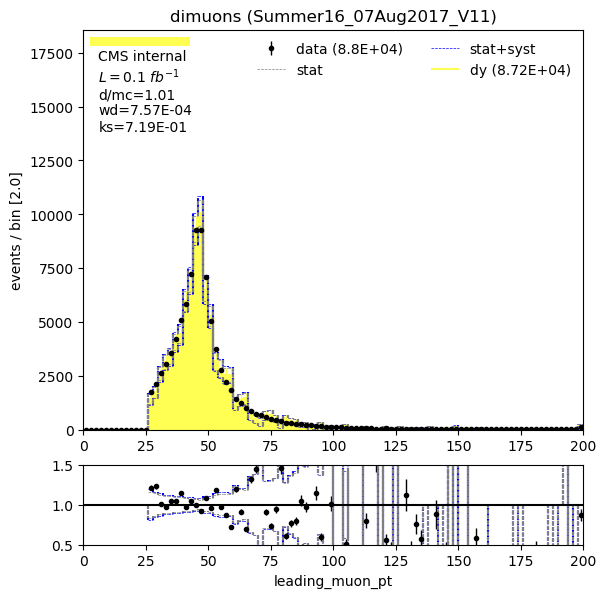

In [10]:
from IPython.display import Image
Image(filename='test_out/baseline/plots/2016/png/baseline_hist__dimuon__leading_muon_pt_nominal.png') 